# **회귀분석**

# **1.단순회귀분석 - 봉사료 tips**

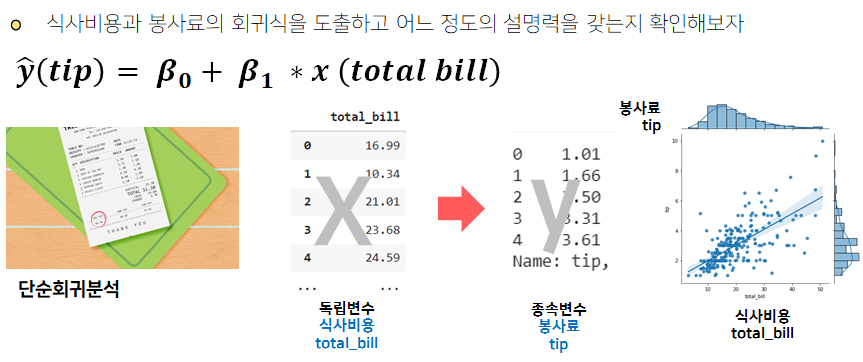

회귀계수와 결정계수를 구하기 위해서 스테츠모델즈 라이브러리를 이용하여 선형회귀모델을 읽어들이고, 분석을 수행 한다. 회귀 모형 자체가 적합한지 확인하기 위해서는 모형에 대한 F 검정과 각 변수에 대한 t-검정을 실시한다.

* 라이브러리명 : import statsmodels.api as sm
* 독립변수와 종속변수 지정 :
> * 독립변수 :  X (행렬, matrix, 데이터프레임) 관례적으로 대문자 X로 표시
> * 종속변수 :  y (벡터, vector, 시리즈) 관례적으로 소문자 y로 표시

* 분석 알고리즘에 선택 : est = sm.OLS(y, X)
> OLS : Ordinary Least Squares (최소자승법 / 최소제곱법)

* 알고리즘의 학습을 통한 모델 구성 : est = sm.OLS(y, X).fit()
* 학습된 모델에서 변수에 대한 계수 확인  
> * 독립변수 및 절편의 계수 :  est.params  

학습된 모델에 대해서 적합도를 검증

* 학습된 모델에서 변수에 대한 계수와 결정계수 확인 :
> * 결정계수 $R^2$ : est.rsquared
> * 분석결과에서 F 검정 값 확인 : est.f_pvalue
> * 분석결과에서 t 검정 값 확인 : est.summary().tables[1]

적합도 확인이 끝났다면, 구해진 회귀식을 이용해서 예측값을 구할 수 있다.
* statsmodels 라이브러리에서 구한 est 모델 객체의 predict 함수를 이용한다.  
>  확인이 필요한 샘플에 대한 데이터프레임 구성
>  total_bill이 20일 때의 예상 봉사료 : est.predict (Xnew)

## 1.1 tips 데이터 시각화

분석 대상이 되는 자료를 읽어들이고,  독립변수, 종속변수 후보에 대해서 분포를 관찰한다.
* 독립변수 : 식사비용 total_bill
* 종속변수 : 봉사료 tip

In [ ]:
# 1.1.1 기본적인 라이브러리를 적재한다.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# 1.1.2 모델에 대한 평가를 위해 statsmodels.api를 임포트 한다.
# 읽어들일 모듈 : statsmodels.api
# 별칭 : sm

import statsmodels.api as sm

In [ ]:
# 1.1.3 봉사료 데이터를 씨본 라이브러리로 부터 읽어 들여서 tips 변수에 할당한다.
tips = sns.load_dataset('tips')
tips.head()

In [ ]:
# 1.1.4 독립변수 식사비용 total_bill과 종속변수 봉사료 tip을 조인트플롯으로 시각화한다.
#      조인트플롯에서 kind = 'reg' 를 전달하면, 회귀선과 함께 시각화 할 수 있다.

sns.jointplot(data = tips, x= 'total_bill', y= 'tip' , kind = 'reg');

관계가 있어 보이긴 한다. 어떤 직선이 예상되는가?

In [ ]:
# 1.1.5 시각화 된 직선에 대해서 상관계수를 확인해보자.

tips.corr(numeric_only=True)

#24년 pandas 라이브업데이트 반영후 숫자필드만 처리하기 위해 numeric_only=True 추가

상관계수가 0.67로 나타난다. '상관계수가 높다'고 할 수 있다.
단순선형회귀분석에서는 상관계수의 제곱이 결정계수가 된다.
상관계수를 제곱한 결정계수를 구해보자.

In [ ]:
# 1.1.6 상관계수에 제곱하여 결정계수를 구해보자.
#  데이터프레임에 .pow(2) 메소드를 수행하면 각 값의 제곱이 구해진다.

tips.corr(numeric_only=True).pow(2)

결정계수는 0.46으로 나타난다. (회귀 분석 결과와 비교해보자.)

## 1.2 독립변수와 종속변수의 준비
- 독립변수와 종속변수를 준비한다.

In [ ]:
# 1.2.1 독립변수는 total_bill이다. 이 때, 독립변수는 복수개의 변수도 처리할 수 있도록 데이터프레임 형태로 전달한다.

X = tips[['total_bill']]   # 대괄호 개수가 2개
X

In [ ]:
#  1.2.2 회귀분석에서 상수 항목을 반영 할 수 있도록 sm.add_constant(X)를 수행한다.
# (참고: OLS 함수는 상수항을 추가해 주어야 절편을 계산한다. sm.add_constant(X))

X = sm.add_constant(X)
X

In [ ]:
# 1.2.3 종속변수는 tip이다. 시리즈로 전달한다.

y = tips['tip']
y

## 1.3 회귀 모형 학습

In [ ]:
# 1.3.1 statsmodels의 OLS (Ordinary Least Squares : 최소자승법) 객체로 분석을 수행한다.
#  est (estimation) 변수에 저장한다.

est = sm.OLS(y, X).fit()

In [ ]:
# 1.3.2 est.params 를 이용해서 독립변수와 절편에대한 대한 계수를 출력해본다.
est.params

In [ ]:
# 1.3.3 est.params 를 이용해서 독립변수 계수를 출력해본다.
# 출력 형태가 수업과 달라도 놀라지 마세요.
# 수업화면  : 0.1050245173843534
# 여러분의 결과 : np.float64(0.1050245173843534)

est.params['total_bill']

In [ ]:
# 1.3.4 회귀 공식 직선의 식을 표현해본다. 소수점 2째자리에서 반올림한다.
print ('y = ', est.params['const'].round(2) ,'+', est.params['total_bill'].round(2) , '* X')
print ('tip = ', est.params['const'].round(2) ,'+', est.params['total_bill'].round(2) , '* total_bill')

## 1.4 회귀모형 적합도 검증

In [ ]:
# 1.4.1 est 객체로 부터 설명력을 확인할 수 있는 결정계수를 구해보자.
# 출력 형태가 수업과 달라도 놀라지 마세요.
# 수업화면  : 0.45661658635167657
# 여러분의 결과 : np.float64(0.45661658635167657)

est.rsquared

In [ ]:
# 1.4.2 est 객체로 부터 F-검정 결과값을 p_value 형태로 확인한다.
# 출력 형태가 수업과 달라도 놀라지 마세요.
# 수업화면  : 6.692470646863209e-34
# 여러분의 결과 : np.float64(6.692470646863209e-34)

est.f_pvalue

F 검정의 p 값이 매우 작은 값으로 (<.0000)회귀모형의 유의하다고 할 수 있다.

In [ ]:
# 1.4.3 est.summary() 함수를 이용하여 종합적인 내용을 확인한다.

print(est.summary())

t -검정의 결과에서도 독립변수에 대한 계수가 (<0.000) 으로 유의수준 0.01에서도 유의하다고 할 수 있다.

## 1.5 회귀모형을 이용한 예측

In [ ]:
# 1.5.1 독립변수 X에 대해서 예측값을 구해본다.
# est.predict( 독립변수 )

est.predict(X)

In [ ]:
# 1.5.2 실제 actual tip 값과 예측된 predicted tip 값을 비교한 그래프를 확인한다.

import matplotlib.pyplot as plt
plt.figure(figsize = (5,5))
plt.scatter (X['total_bill'],y, label = 'actual') #실제값
plt.scatter (X['total_bill'], est.predict(X), label = 'predicted')  # 예측값
plt.legend()
plt.title('actual vs. predicted');

In [ ]:
# 1.5.3 회귀 모델이 구해졌다면 식사대금으로 부터 봉사료를 예측해보자.
#    statsmodel 에서 생성한 모델링 객체는 predict 메소드를 이용해서 예측값을 제공한다.
#    식사 금액 total_bill이 $20, $30 인 경우로 종속 변수를 예측해보자.

# 1.5.3.1 독립변수 X와 동일한 형태의 데이터프레임을 생성한다. 절편 intercept를 포함해야 한다.

Xnew = pd.DataFrame({'intercept': 1, 'total_bill': [20,30]})
Xnew

In [ ]:
 # 1.5.3.2 est.predict에 Xnew를 전달하여 예측값을 구해본다.
 est.predict(Xnew)

In [ ]:
# 1.5.4  식사비용이 $30 일 때의 봉사료를 회귀식으로 부터 직접 구해보자.
y_pred2 =  est.params['total_bill'] * 30 + est.params['const']
print ('회귀모델로 $30의 봉사료 tip 예측 :', y_pred2)

## 1.6 연습문제

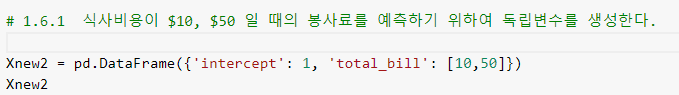

In [ ]:
# 1.6.1  식사비용이 $10, $50 일 때의 봉사료를 예측하기 위하여 독립변수를 생성한다.



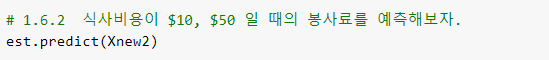

In [ ]:
# 1.6.2  식사비용이 $10, $50 일 때의 봉사료를 예측해보자.


# **2.더미변수를 이용한 다중 회귀분석-학생성적과 환경요인 score**

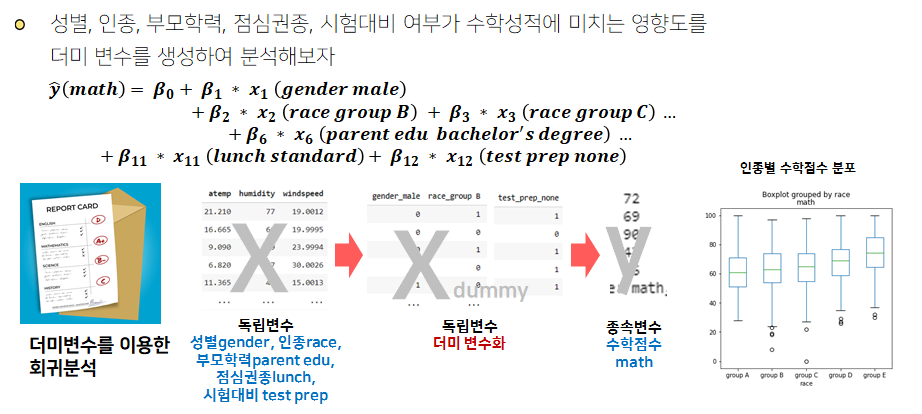

질적변수(명목척도)의 영향도를 평가하기 위해서 더미변수를 생성해서 회귀분석을 수행해본다.
> * 성별 gender : male, female
> * 인종 race/ethnicity : group A ~ group E
> * 부모학력 parent educational level :bachelor's degree, some college, master's degree, associate's degree, high school, some high school
> * 점심권종 lunch : standard , free/reduced
> * 시험대비 test preparation course : none, completed

* **case1 : reading과 math 의 회귀 영향을 분석한다.**
* **case2 : reading과 math 관계의 gender가 미치는 영향을 분석한다.**
* **case3 : reading과 math 관계에 영향을 미치는 다른 질적 변수를 찾아본다.**

**더미변수의 생성**
* 판다스의 get_dummies 함수를 사용한다.
* 질적변수가 n개의 항목값을 가질 때 n-1개의 더미변수로 표현할 수 있다.
> pd.get_dummies (score['gender'] , drop_first = True )

**데이터프레임 연결**
* 판다스의 concat 함수를 사용한다.
* 연결할 데이터프레임 목록을 인수로 전달한다.
* 가로 방향으로 연결하기 위해서 axis = 'columns' 인수를 전달한다.  
>  pd.concat ([ X_reading , gender_dummy  ], axis = 'columns')

## 2.1 score 데이터 적재 및 시각화

score 데이터를 적재하고,  변수간의 관계를 시각화하여 관찰하여 독립변수의 후보를 선정해본다.

In [ ]:
# 2.1.1 관련 라이브러리 적재
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [ ]:
# 2.1.2 score 데이터를 적재한다.

score = pd.read_csv('https://raw.githubusercontent.com/cranberrygame/data_analysis/master/StudentsPerformance.csv')
score.tail()

In [ ]:
# 2.1.3 수치 데이터에 해당하는 math score, reading score, writing score에 대해서 페이플롯으로 관찰한다.

sns.pairplot(data = score);

In [ ]:
# 2.1.4 상관계수로 연관관계를 확인한다.
score.corr(numeric_only=True)

* reading과 math는 0.8176의 상관관계를 갖는다.

In [ ]:
# 2.1.5  reading score과 math score의 점수를 조인트플롯으로 관찰해본다. (kind = 'reg' 로 회귀선도 함께 관찰한다. )

sns.jointplot(x= 'reading score', y= 'math score', data = score, kind = 'reg');

## 2.2 [case1] math-reading 단순회귀분석

In [ ]:
# 2.2.1 단순회귀 분석 수행을 위한 독립변수 X_reading를 준비한다.

X_reading = sm.add_constant(score[['reading score']])
X_reading


In [ ]:
# 2.2.2 단순회귀 분석 수행을 위한 종속변수 y_math를 준비한다.
y_math = score['math score']
y_math

In [ ]:
# 2.2.3 단순회귀 분석을 수행하고 요약정보를 확인한다.
est_case1 = sm.OLS(y_math, X_reading).fit()
print(est_case1.summary())

reading score를 이용한  math score 회귀식
* 결정계수 : 0.668
* F의 p값 , 각 변수 t의 p값이 충분히 작다.
* math = reading * 0.8491 + 7.3576

## 2.3 [case2] math-reading에 gender 영향 분석

지난 단원 상관관계 분석에서 성별, 점심식사제공여부에 따라 분포에 유의미한 차이가 있음을 관찰 하였었다.

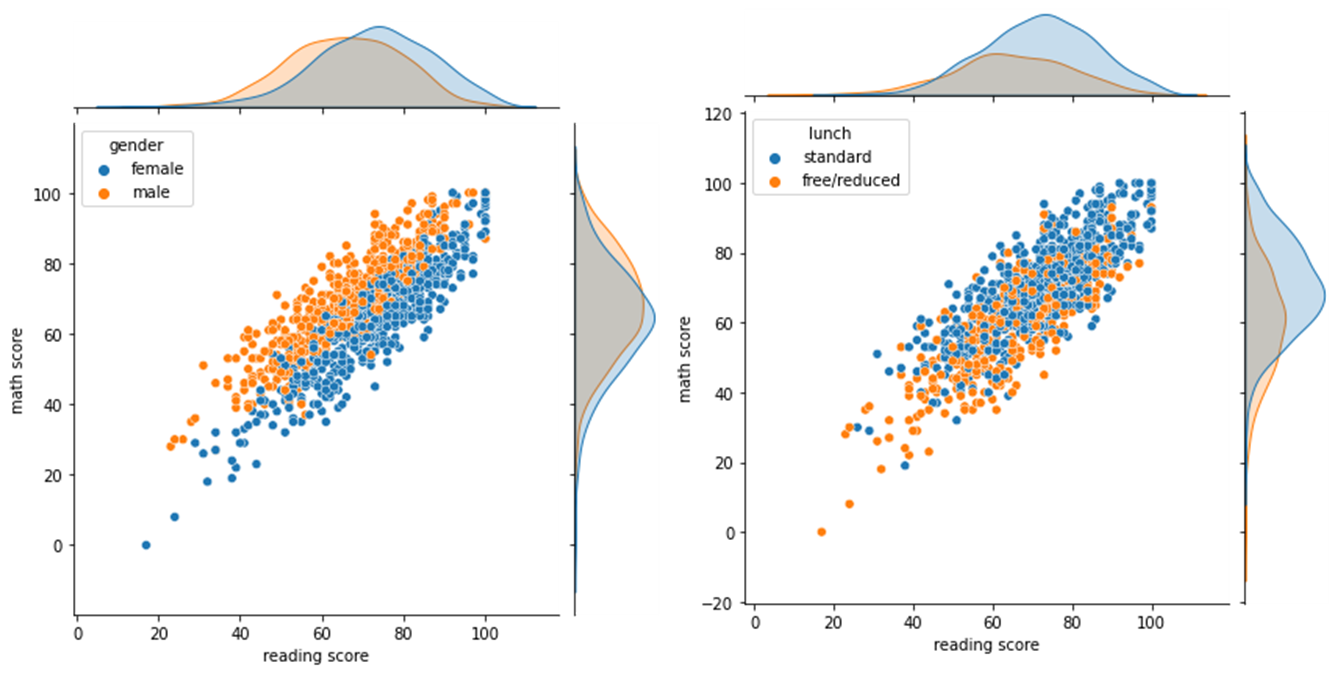

가장 명확하게 영향이 있어보이는 gender를 더미변수화 하여 회귀분석을 진행하기 위해서 gender를 더미변수화 하여 독립변수를 생성한다.

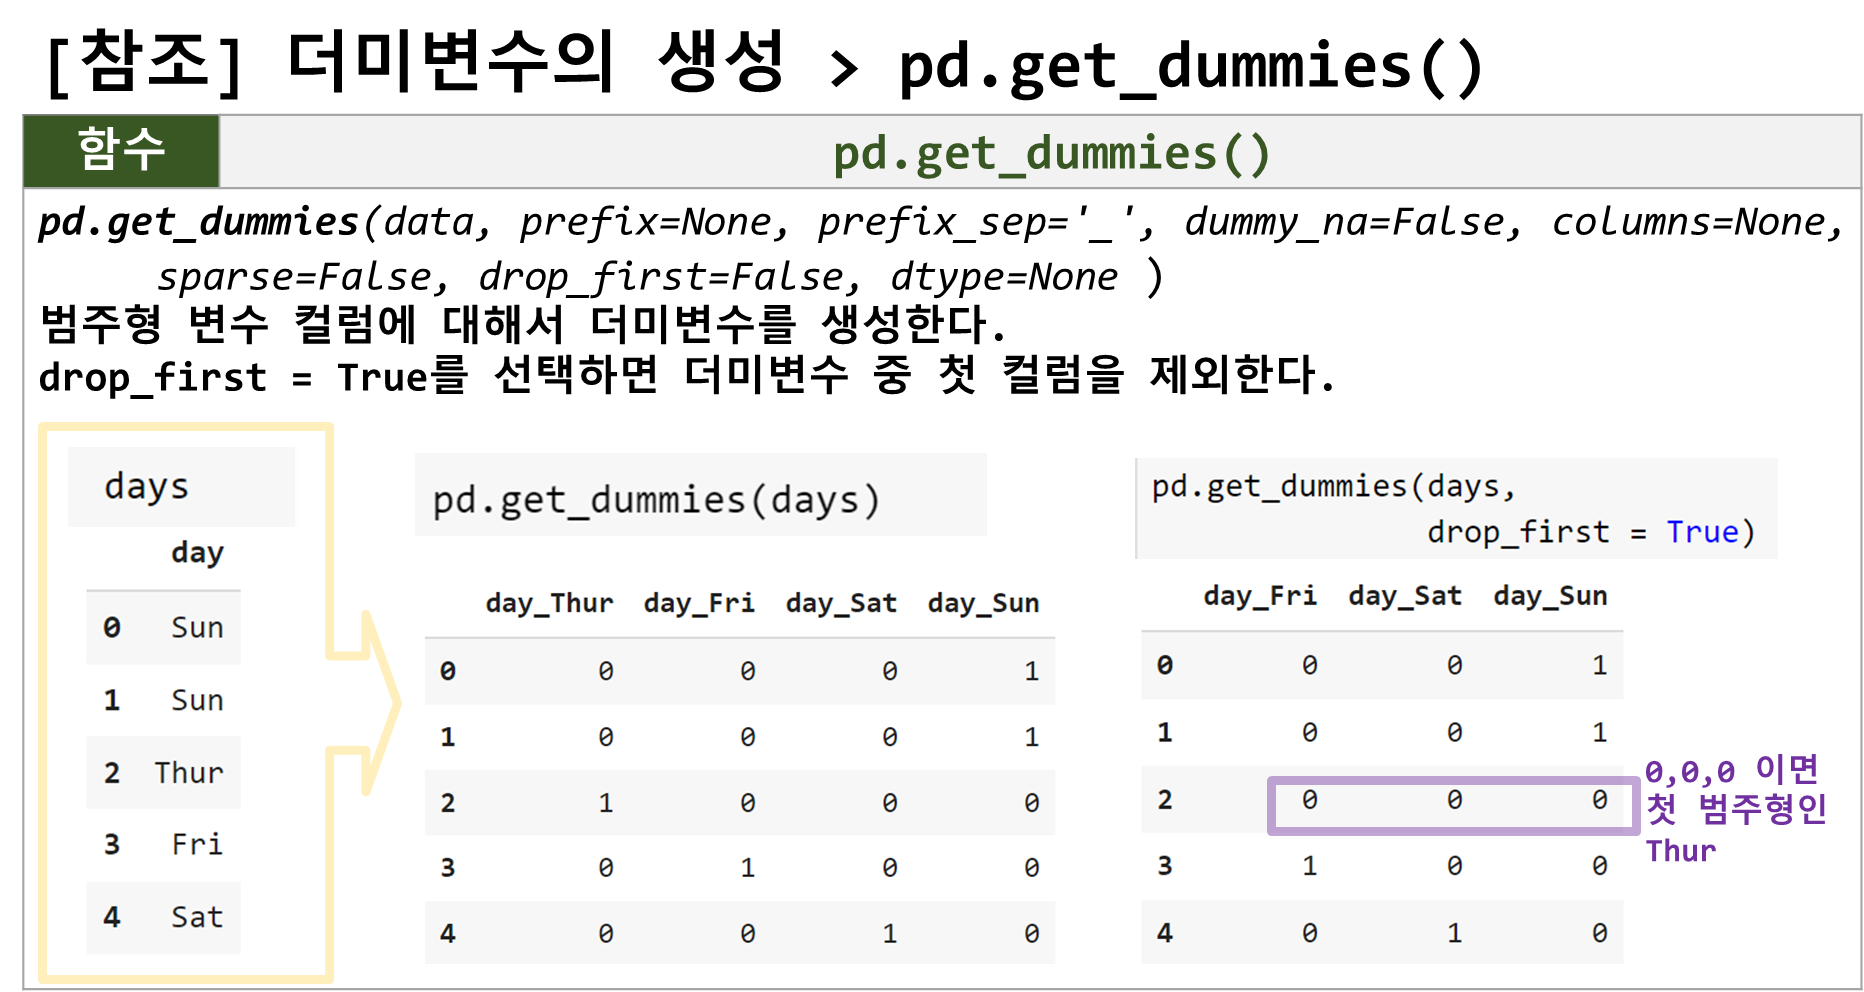

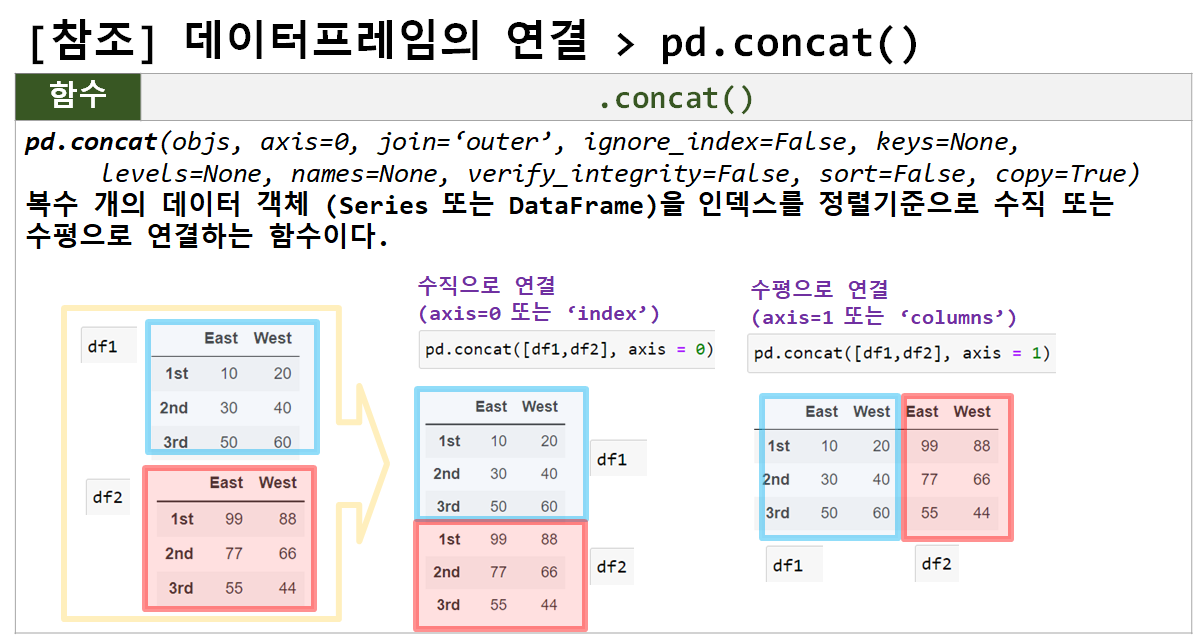

In [ ]:
# 2.3.1 gender 변수를 분석에 활용 할 수 있도록 더미 변수를 생성한다.
# pd.get_dummies 함수를 사용한다.
gender_dummy = pd.get_dummies(score['gender'], drop_first = True, dtype=float)
gender_dummy

# 24년도 pandas 버전업에 따라 더미변수 결과물의 타입을 명시적으로 지정 dtype = float

In [ ]:
# 2.3.2  독립변수 X_reading에 gender_dummy를 연결하여 X_reading_gender를 생성한다.
# pd.concat 함수를 사용한다.
X_reading_gender = pd.concat( [X_reading, gender_dummy], axis = 'columns')
X_reading_gender

In [ ]:
# 2.3.3 gender 더미변수가 포함된 다중회귀 분석을 수행하고 요약정보를 확인한다.
est_case2 = sm.OLS(y_math, X_reading_gender).fit()
print(est_case2.summary())

gender 요소를 감안한 reading score를 이용한  math score 회귀식
* 결정계수 : 0.812  ( cf. 미반영 단순 회귀시의 결정계수 0.668)
* F의 p값 , 각 변수 t의 p값이 충분히 작다.
* math = reading * 0.9483 + male * 11.8614 - 5.2230

In [ ]:
# 2.3.4  gender로 범주화 된 조인트플롯에  회귀식의 예측결과를 출력해본다.
y_math_pred = est_case2.predict(X_reading_gender)
axes = sns.jointplot(data = score, x = 'reading score', y ='math score', hue = 'gender')
axes.ax_joint.scatter (X_reading_gender['reading score'], y_math_pred, color = 'r') ;

In [ ]:
# 2.3.5 reading score 80 인 남학생과 여학생의 math score를 예측해보자.
# (1) 예측을 수행하기 위한 샘플 데이터프레임 생성
X_new = pd.DataFrame({'const':1, 'reading score': 80, 'gender':[0,1]})
X_new

In [ ]:
# 2.3.6
# (2) est_case2를 이용하여 예측값 산출
est_case2.predict(X_new)

## 2.4 [case3] math-reading 모든 질적변수 영향도 분석3

In [ ]:
# 2.4.1 다른 질적변수에 대해서 더미 변수를 생성하고, 이를 반영한 독립변수 X_reading_other를 구성한다.

# (1) 'race/ethnicity', 'parental level of education' ,'lunch','test preparation course' 더미변수  other_dummy구성
#  pd.get_dummies()
# 24년도 pandas 버전업에 따라 더미변수 결과물의 타입을 명시적으로 지정 dtype = float
other_dummy = pd.get_dummies (score[['race/ethnicity',
                                     'parental level of education',
                                     'lunch',
                                     'test preparation course']],
                              drop_first = True, dtype=float)

# (2) X_reading_gender와  other_dummy를 연결하여 X_reading_other 생성
# pd.concat()
X_reading_other = pd.concat([X_reading_gender, other_dummy], axis = 1)

# (3) X_reading_gender 출력
X_reading_other

In [ ]:
# 2.4.2 모든 질적 더미변수가 포함된 다중회귀 분석을 수행하고 요약정보를 확인한다.
est_case3 = sm.OLS(y_math, X_reading_other).fit()
print(est_case3.summary())

모든 환경요소를 감안한 reading score를 이용한  math score 회귀식
* 결정계수 : 0.844  ( cf. 미반영 단순 회귀시의 결정계수 0.668, gender만 반영 0.812)
* F의 p값 : 충분히 작다
* 각 변수 t의 p값 해석
> * gender : 유의미한 차이를 발생시킨다.
> * race/ethnicity : group E에 대해서만 유의미한 차이를 발생한다.
> * parental level of education : 영향력이 미미하다.
> * lunch standard : 유의미한 차이를 발생시킨다.
> * test preparation corse : 약간의 유의미한 차이를 발생시킨다. 수강하지 않은 학생이 오히려 수학점수의 향상 가능성이 크다.

In [ ]:
# 2.4.3 유의미한 변수로만 독립변수를 재구성한다.
X_reading_other_2 = X_reading_other[['const',
                                     'reading score',
                                     'male',
                                     'race/ethnicity_group E',
                                     'lunch_standard',
                                     'test preparation course_none']]
X_reading_other_2

In [ ]:
# 2.4.4 재구성한 독립변수 X_reading_other_2를 이용하여 회귀분석을 진행하고 결과를 해석한다.
est_case3_2 = sm.OLS(y_math, X_reading_other_2).fit()
print(est_case3_2.summary())

모든 환경요소를 감안한 reading score를 이용한  math score 회귀식 (유의미한 변수만 사용)
* 결정계수 : 0.842 (cf 직전 모든 변수 반영 0.844,  미반영 단순 회귀시의 결정계수 0.668, gender만 반영 0.812)
* F의 p값 : 충분히 작다
* 각 변수 t의 p값 해석
> * gender : 유의미한 차이를 발생시킨다. (male일경우 11.45 향상)
> * race/ethnicity : group E에 대해서만 유의미한 차이를 발생한다. (4.3594 향상)
> * lunch standard : 유의미한 차이를 발생시킨다. (4.2865 향상)
> * test preparation corse : 약간의 유의미한 차이를 발생시킨다. 수강하지 않은 학생이 오히려 수학점수의 향상 가능성이 크다. (1.2792 향상)

* 회귀식 : y_math = reading * 0.9118 + male * 11.4589 + group E * 4.3594 + lunch_standard * 4.2865 + test preparation course_none * 1.2792 -6.6984

## 2.5 연습문제

[case1]에서 math-reading 점수간의 관계에서 gender 대신에 lunch로 그 영향도를 분석해보자.

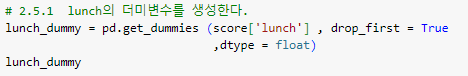

In [ ]:
# 2.5.1  lunch의 더미변수를 생성한다.


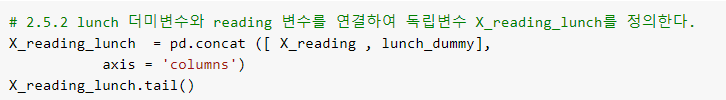

In [ ]:
# 2.5.2 lunch 더미변수와 reading 변수를 연결하여 독립변수 X_reading_lunch를 정의한다.


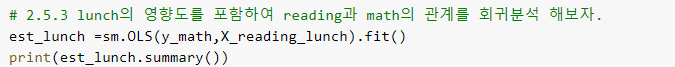

In [ ]:
# 2.5.3 lunch의 영향도를 포함하여 reading과 math의 관계를 회귀분석 해보자.


**생각해보기**
* 회귀계수를 해석해보자. lunch 권종에 따른 차이가 어느 정도 점수 영향을 미치는가?
* 결정계수를 살펴본다. reading과 math만을 비교해보았을 때보다 좋아졌는가?
* 두 변수 모두 유의하게 판단되는가?